In [72]:
import io
%cd "C:\Users\Admin\Desktop\hackthon\bigmartsales"

C:\Users\Admin\Desktop\hackthon\bigmartsales


In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [75]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [76]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [77]:
bigmarttest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [78]:
#for comibing comine test and train
bigmarttest['Item_Outlet_Sales']='test'

In [79]:
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)

In [80]:
combinedf.shape

(14204, 12)

In [81]:
combinedf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [82]:
combinedf.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [84]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [85]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [86]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [87]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.median())

In [88]:
combinedf.Item_Weight.describe()

count    14204.000000
mean        12.759739
std          4.234851
min          4.555000
25%          9.300000
50%         12.600000
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [89]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())

In [90]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [91]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])

In [92]:
combinedf.Item_Code.value_counts() 

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [93]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [94]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [95]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [96]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [97]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [98]:
zerovisible=combinedf[combinedf.Item_Visibility==0]

In [99]:
zerovisible.shape

(879, 13)

In [100]:
combinedf.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [101]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [102]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [103]:
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [104]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [114]:
combinedf.Outlet_Establishment_Year.describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [106]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [107]:
combinedf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,FD,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.38,FD,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,34


In [116]:
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [117]:
print(numericcols.shape)
print(objectcols.shape)

(14204, 5)
(14204, 9)


In [118]:
objectcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Code'],
      dtype='object')

In [119]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age'],
      dtype='object')

In [120]:
numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales

C:\Users\Admin\AppData\Local\Temp/ipykernel_11992/2433453598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales


In [121]:
objectcols=objectcols.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)

In [126]:
objectcolsdummy=pd.get_dummies(objectcols)
#dummy encode or label encode non numeric object data

In [127]:
print(objectcols.shape)
print(objectcolsdummy.shape)

(14204, 7)
(14204, 42)


In [147]:
objectcolsdummy.head(6)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [129]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Outlet_Sales'],
      dtype='object')

In [140]:
numericcols=numericcols.drop('Outlet_Establishment_Year',axis=1)

KeyError: "['Outlet_Establishment_Year'] not found in axis"

In [141]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)
#column concatenation

In [142]:
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales=='test']

In [143]:
print(bigmarttraindf)
print(bigmarttestdf)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Age Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          22          3735.138   
1           5.920         0.019278   48.2692          12          443.4228   
2          17.500         0.016760  141.6180          22           2097.27   
3          19.200         0.000000  182.0950          23            732.38   
4           8.930         0.000000   53.8614          34          994.7052   
...           ...              ...       ...         ...               ...   
8518        6.865         0.056783  214.5218          34         2778.3834   
8519        8.380         0.046982  108.1570          19           549.285   
8520       10.600         0.035186   85.1224          17         1193.1136   
8521        7.210         0.145221  103.1332          12         1845.5976   
8522       14.800         0.044878   75.4670          24            765.67   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0  

In [144]:
print(bigmarttraindf.shape)
print(bigmarttestdf.shape)

(8523, 47)
(5681, 47)


In [145]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [150]:
bigmarttraindf.Item_Outlet_Sales.dtypes

dtype('float64')

In [149]:
bigmarttraindf.Item_Outlet_Sales=pd.to_numeric(bigmarttraindf.Item_Outlet_Sales)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:ylabel='Item_Outlet_Sales'>

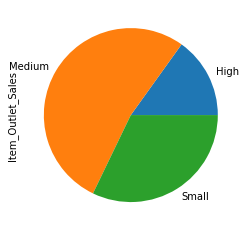

In [231]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Size).sum().plot(kind="pie")

<AxesSubplot:ylabel='Item_Outlet_Sales'>

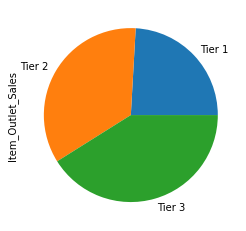

In [232]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).sum().plot(kind="pie")

<AxesSubplot:xlabel='Item_Type'>

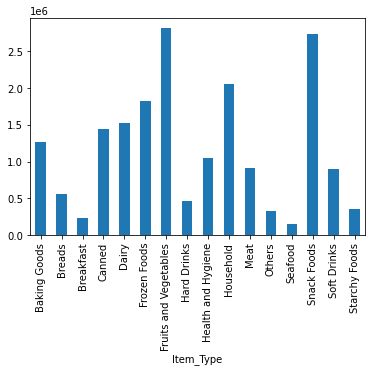

In [234]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Item_Type).sum().plot(kind="bar")

In [206]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Item_Outlet_Size).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [215]:
gs=bigmarttrain[bigmarttrain.Outlet_Type=="Grocery Store"]
Sm1=bigmarttrain[bigmarttrain.Outlet_Type=="SupermarketType1"]
Sm2=bigmarttrain[bigmarttrain.Outlet_Type=="SupermarketType2"]
Sm3=bigmarttrain[bigmarttrain.Outlet_Type=="SupermarketType3"]

In [214]:
from scipy.stats import f_oneway

In [219]:
f_oneway(gs.Item_Outlet_Sales,Sm1.Item_Outlet_Sales,Sm2.Item_Outlet_Sales,Sm3.Item_Outlet_Sales)

F_onewayResult(statistic=nan, pvalue=nan)

In [221]:
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [223]:
T1=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 1"]
T2=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 2"]
T3=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 3"]

In [224]:
from scipy.stats import f_oneway

In [225]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)
#p value less than 0.05 reject null

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [ ]:
pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Type)

In [ ]:
from scipy.stats import chi2_contingency

In [160]:
y=bigmarttraindf.Item_Outlet_Sales  #dependent variable
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)#independent var

In [184]:
X.shape

(8523, 46)

<AxesSubplot:>

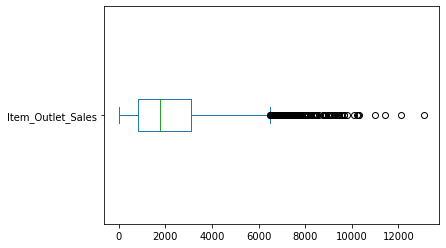

In [161]:
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Frequency'>

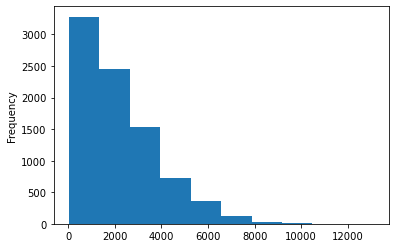

In [162]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

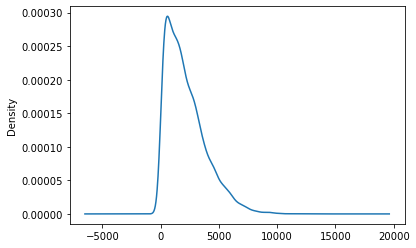

In [165]:
y.plot(kind='density')

In [186]:
print(y.skew())

1.1775306028542796


In [187]:
print(y.kurt())

1.6158766814287264


In [176]:
from sklearn.linear_model import LinearRegression
#here sklearn is a package in ML

In [177]:
reg=LinearRegression()

In [185]:
regmodel=reg.fit(X,y)

In [188]:
regmodel.score(X,y) #R sqaure-0.56377

0.5637737001510252

In [189]:
regmodel.intercept_

-577.1596763296411

In [190]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5200273627394066), ('Item_Visibility', -300.0670763009723), ('Item_MRP', 15.570635789832693), ('Outlet_Age', 14.37422848042076), ('Item_Fat_Content_Low Fat', -21.059166195450253), ('Item_Fat_Content_Regular', 21.059166195452452), ('Item_Type_Baking Goods', -3.2104710018461797), ('Item_Type_Breads', 1.9250378206227863), ('Item_Type_Breakfast', 3.9839650536817324), ('Item_Type_Canned', 22.271905888702026), ('Item_Type_Dairy', -53.00446586276449), ('Item_Type_Frozen Foods', -31.253550501580428), ('Item_Type_Fruits and Vegetables', 26.513725797523737), ('Item_Type_Hard Drinks', -47.26078009769432), ('Item_Type_Health and Hygiene', 4.42307140752538), ('Item_Type_Household', -24.342665740883746), ('Item_Type_Meat', -3.8580798577954942), ('Item_Type_Others', -6.538845577655232), ('Item_Type_Seafood', 181.66630948761355), ('Item_Type_Snack Foods', -14.608311286519614), ('Item_Type_Soft Drinks', -74.89160051671317), ('Item_Type_Starchy Foods', 18.18475498779101), ('Outlet_Id

In [191]:
regpredict=regmodel.predict(X)

In [192]:
regpredict

array([4009.76011104,  562.5129848 , 2369.82262179, ..., 1525.94416664,
       1394.19304552, 1209.38313357])

In [193]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [194]:
regresiduals=y-regpredict

In [197]:
regresiduals.head()

0   -274.622111
1   -119.090185
2   -272.552622
3   -341.004532
4     85.776022
Name: Item_Outlet_Sales, dtype: float64

In [199]:
np.sqrt(np.mean(regresiduals**2))  #RMSE-1127.0330

1127.033014742992